In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('heart_disease.csv')

# Display the DataFrame
print(df)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

### Calculating the each gender percentage in the data

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('heart_disease.csv')

# Calculate the percentage of female and male patients
total_count = len(df)
female_count = df[df['sex'] == 0]['sex'].count()
male_count = df[df['sex'] == 1]['sex'].count()

female_percentage = (female_count / total_count) * 100
male_percentage = (male_count / total_count) * 100

print("Female Percentage:", female_percentage)
print("Male Percentage:", male_percentage)


Female Percentage: 30.4390243902439
Male Percentage: 69.5609756097561


In [5]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


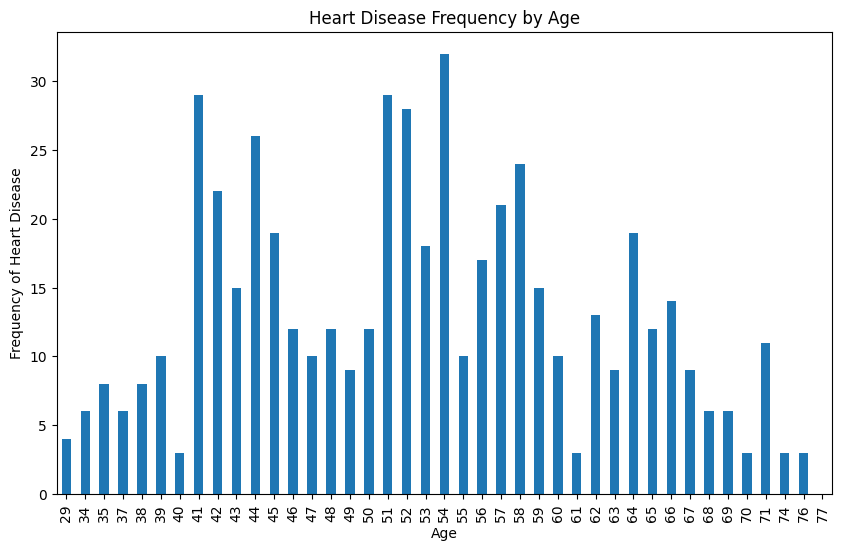

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
age_frequency = df.groupby('age')['target'].sum()
age_frequency.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Frequency of Heart Disease')
plt.title('Heart Disease Frequency by Age')
plt.show()


## 1. Performing data exploration on the "heart_disease.csv" dataset. 

In [8]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Get summary statistics of the dataset

In [10]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check the distribution of the target variable ('target')

In [11]:
df['target'].value_counts()


target
1    526
0    499
Name: count, dtype: int64

### Visualize the distribution of the target variable using a bar plot:

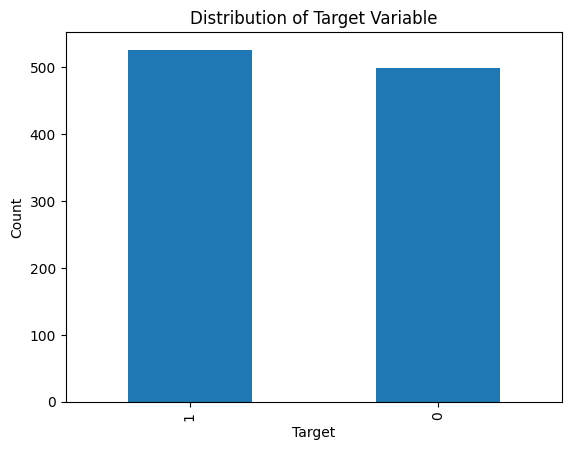

In [12]:
df['target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()


### Check the correlation between features using a correlation matrix:

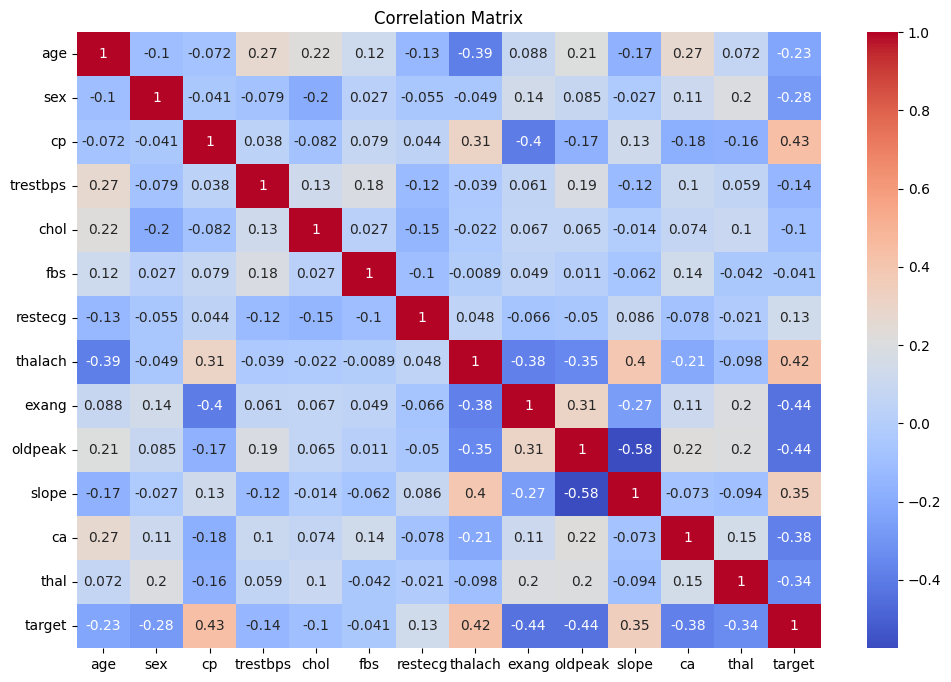

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Explore the distribution of numerical features using histograms:

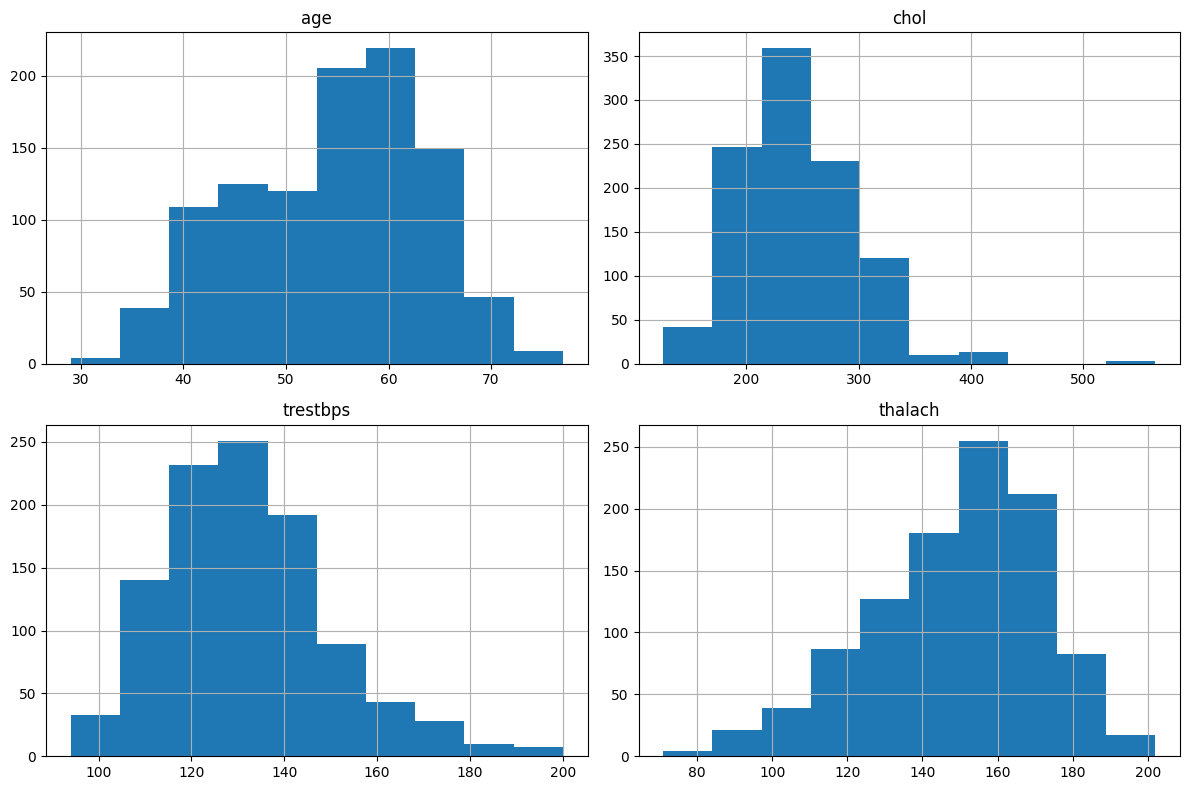

In [15]:
numerical_features = ['age', 'chol', 'trestbps', 'thalach']
df[numerical_features].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


### Visualize the relationship between categorical features and the target variable using stacked bar plots

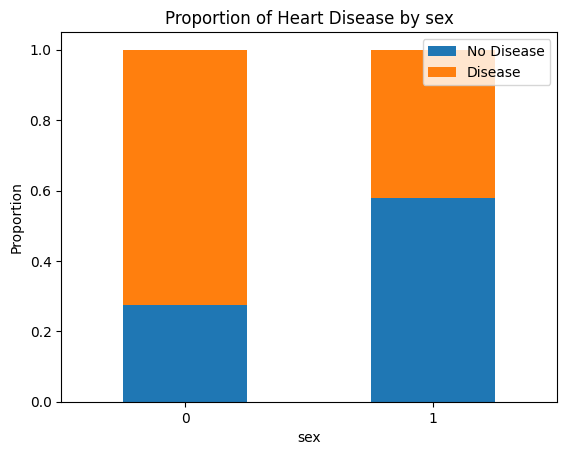

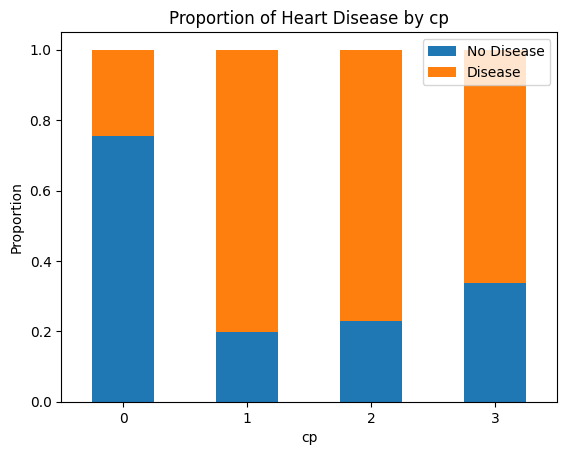

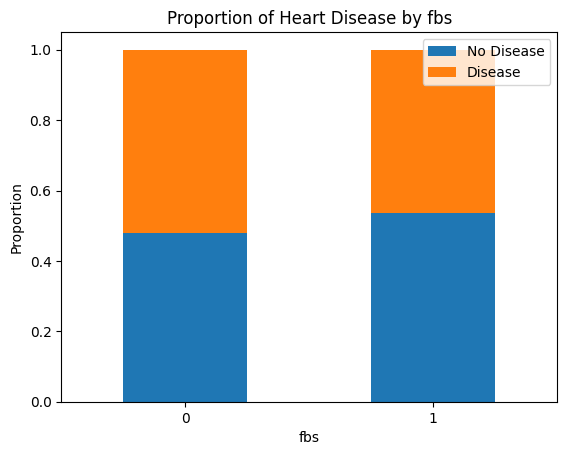

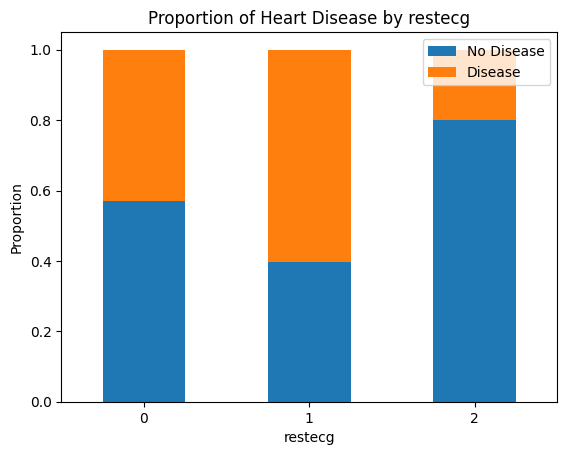

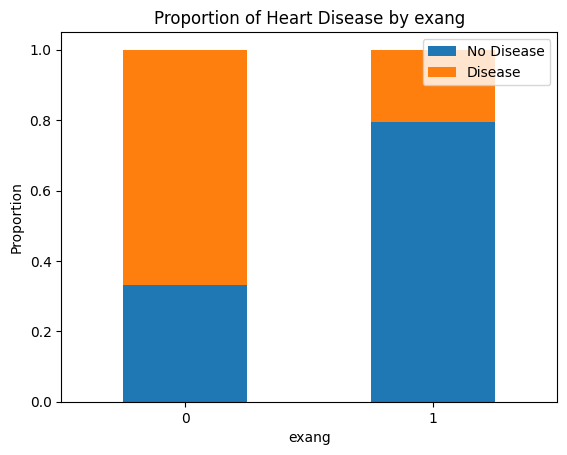

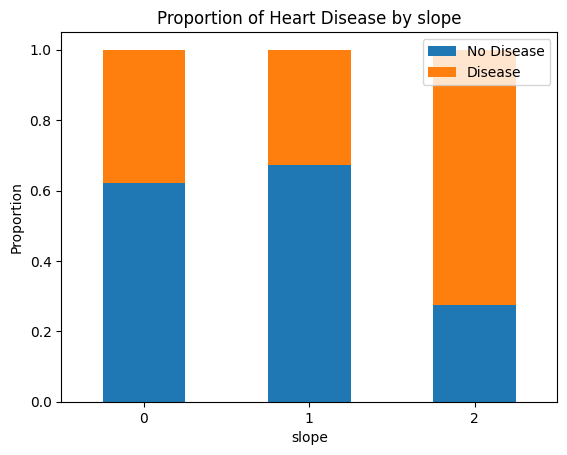

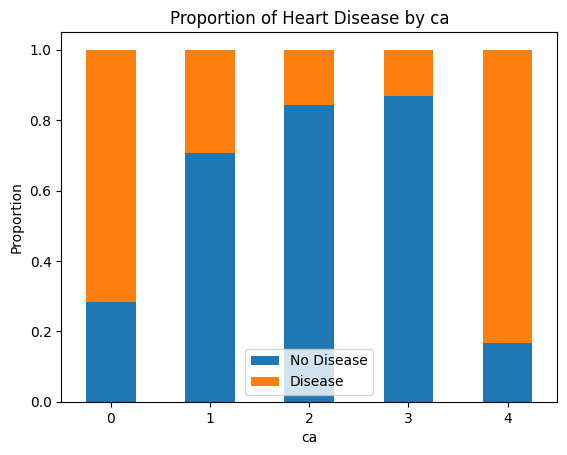

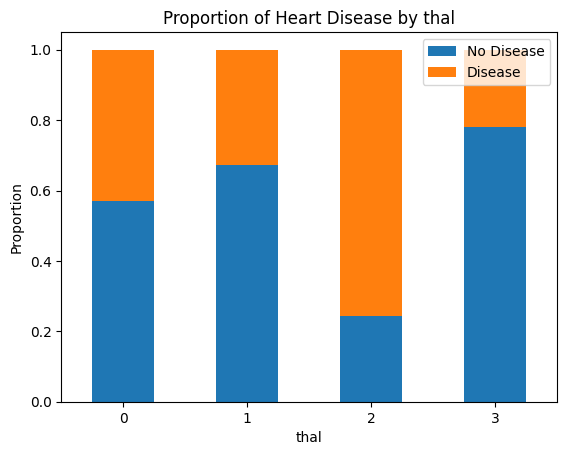

In [16]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in categorical_features:
    cross_tab = pd.crosstab(df[feature], df['target'])
    cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.title('Proportion of Heart Disease by {}'.format(feature))
    plt.legend(['No Disease', 'Disease'])
    plt.xticks(rotation=0)
    plt.show()


### Detect outliers using box plots:

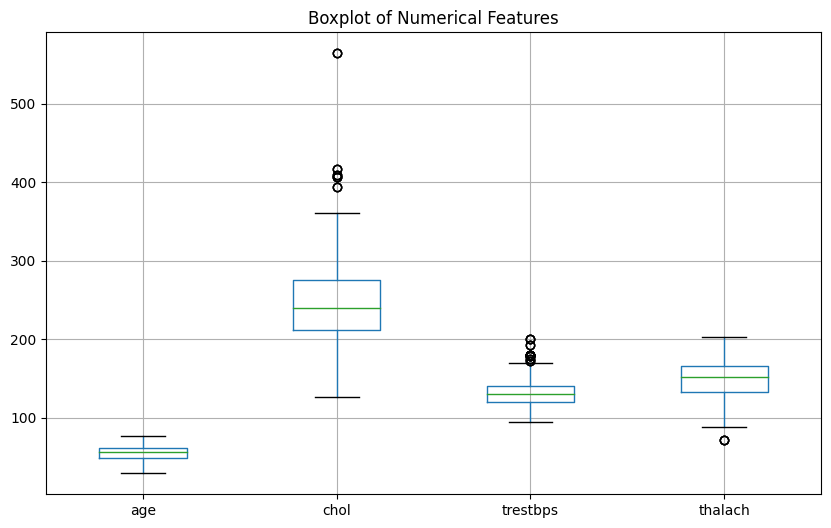

In [17]:
numerical_features = ['age', 'chol', 'trestbps', 'thalach']
df[numerical_features].boxplot(figsize=(10, 6))
plt.title('Boxplot of Numerical Features')
plt.show()


### Analyze the correlation between numerical features and the target variable

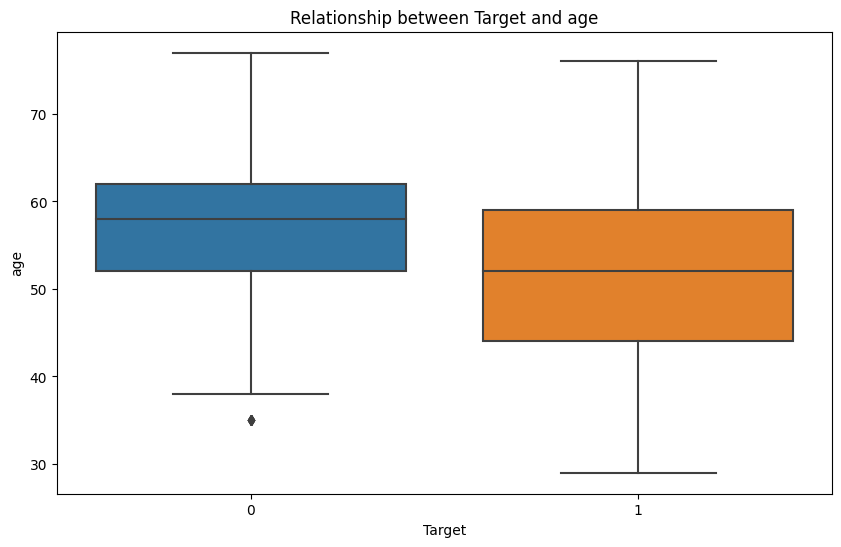

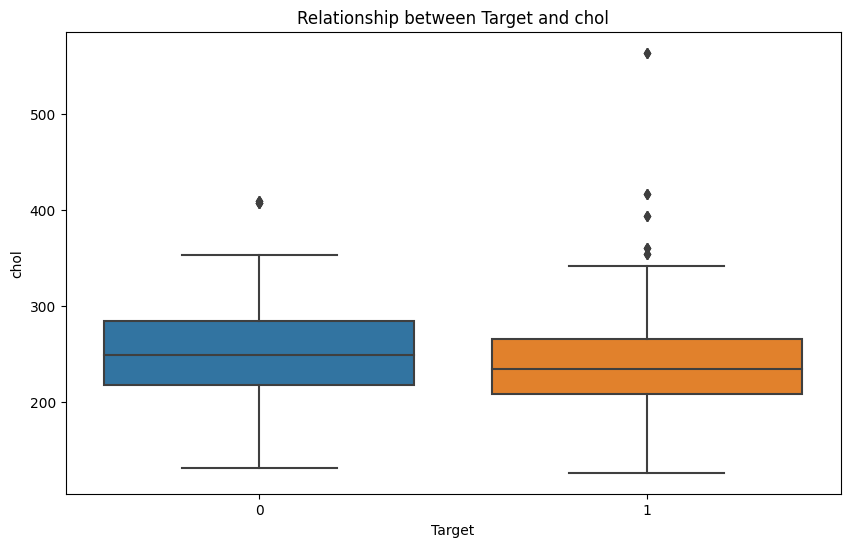

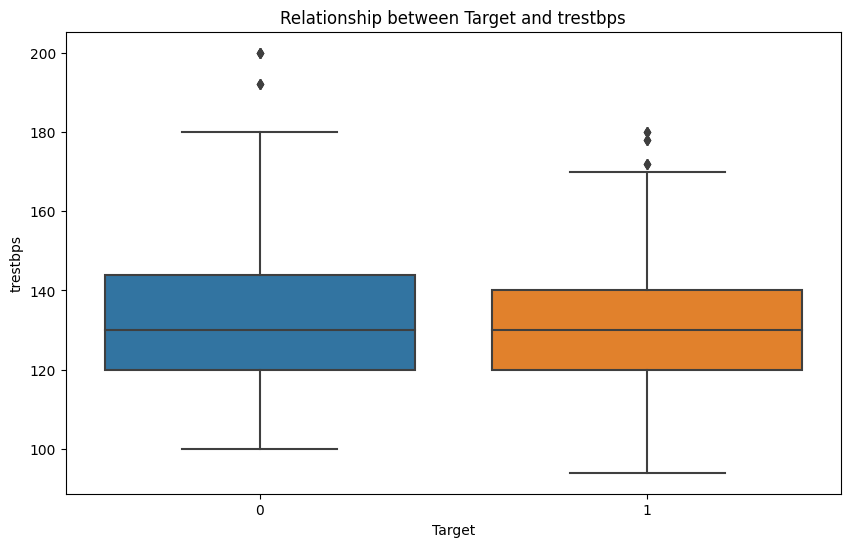

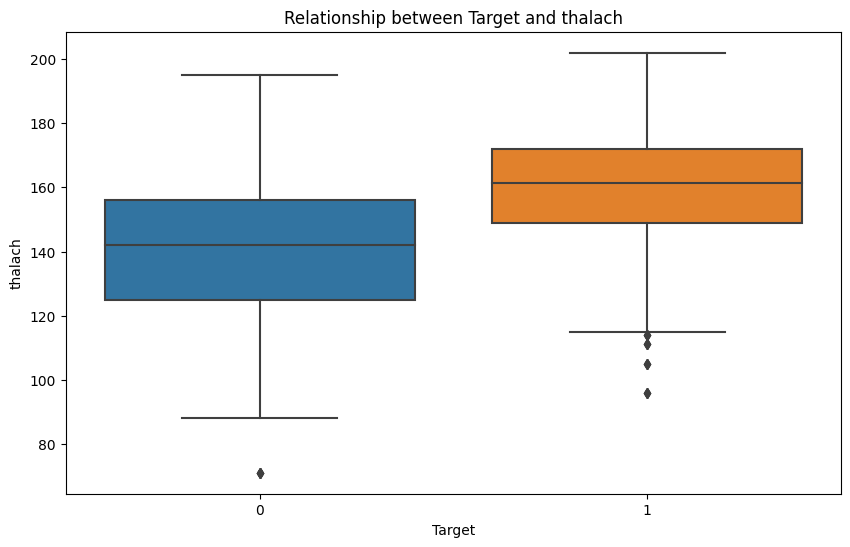

In [18]:
numerical_features = ['age', 'chol', 'trestbps', 'thalach']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=df)
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.title('Relationship between Target and {}'.format(feature))
    plt.show()


### Explore the relationship between pairs of features using scatter plots

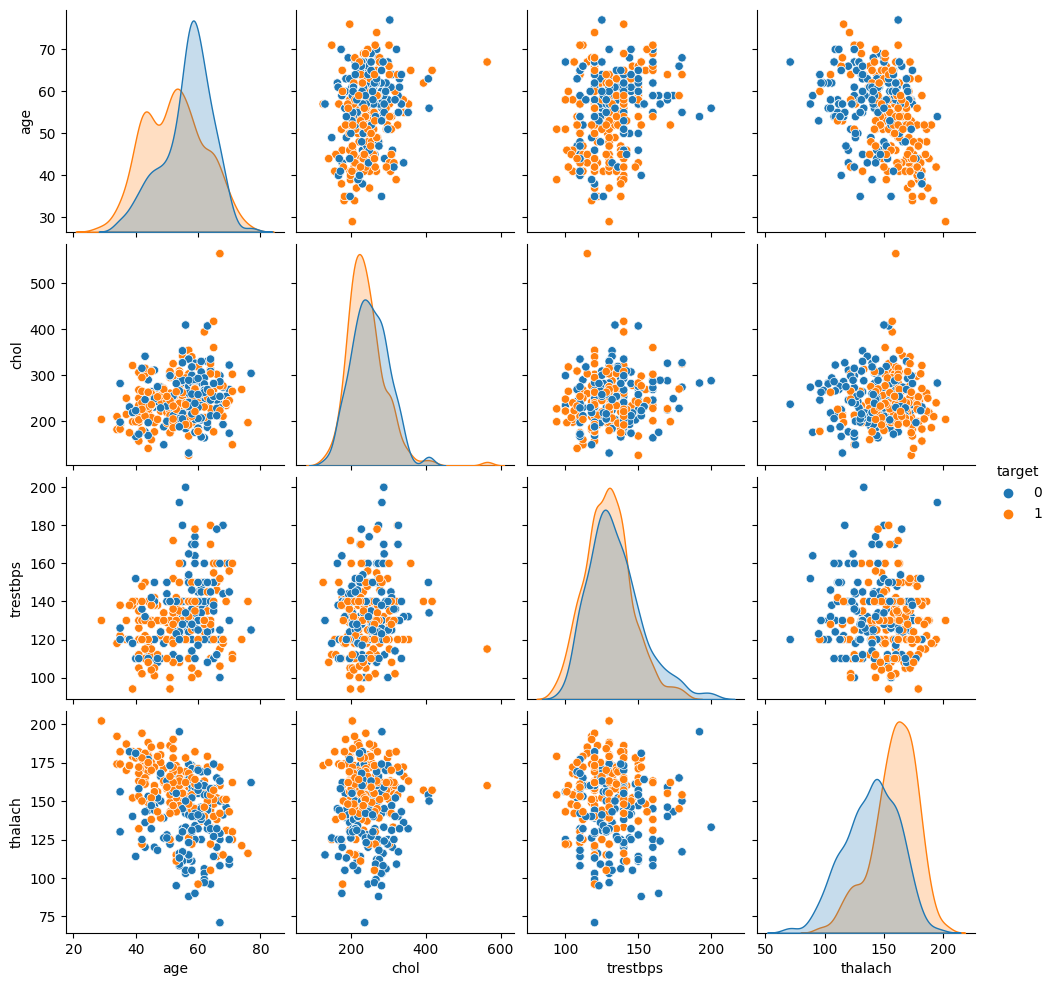

In [19]:
sns.pairplot(df, vars=['age', 'chol', 'trestbps', 'thalach'], hue='target')
plt.show()


 ## 2. Feature Engineering
 Feature engineering involves creating new features from existing data to improve the predictive power of machine learning models. Here are some ideas for feature engineering on the "heart_disease.csv" dataset:

### Age Group: Create age groups by binning the 'age' feature into different ranges, such as young, middle-aged, and elderly.

In [23]:
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Older', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(df[['age', 'age_group']].head())


   age age_group
0   52     Older
1   53     Older
2   70    Senior
3   61    Senior
4   62    Senior


### Cholesterol Ratio: Calculate the ratio of 'chol' (total cholesterol) to 'thalach' (maximum heart rate achieved).

In [24]:
df['chol_thalach_ratio'] = df['chol'] / df['thalach']
print(df[['chol', 'thalach', 'chol_thalach_ratio']].head())

   chol  thalach  chol_thalach_ratio
0   212      168            1.261905
1   203      155            1.309677
2   174      125            1.392000
3   203      161            1.260870
4   294      106            2.773585


### Resting Blood Pressure Category: Create categories based on 'trestbps' (resting blood pressure) levels.

In [26]:
import numpy as np

conditions = [
    (df['trestbps'] < 120),
    (df['trestbps'] >= 120) & (df['trestbps'] < 140),
    (df['trestbps'] >= 140)
]
labels = ['Normal', 'Elevated', 'High']
df['trestbps_category'] = np.select(conditions, labels)

# Display the updated DataFrame with the 'trestbps_category' column
print(df[['trestbps', 'trestbps_category']].head())


   trestbps trestbps_category
0       125          Elevated
1       140              High
2       145              High
3       148              High
4       138          Elevated


### Maximum Heart Rate Category: Categorize 'thalach' (maximum heart rate achieved) into low, normal, and high categories.

In [27]:
conditions = [
    (df['thalach'] < 120),
    (df['thalach'] >= 120) & (df['thalach'] < 160),
    (df['thalach'] >= 160)
]
labels = ['Low', 'Normal', 'High']
df['thalach_category'] = np.select(conditions, labels)

# Display the updated DataFrame with the 'thalach_category' column
print(df[['thalach', 'thalach_category']].head())


   thalach thalach_category
0      168             High
1      155           Normal
2      125           Normal
3      161             High
4      106              Low


## 3. Data Processing
Data preprocessing is an essential step in preparing the data for machine learning algorithms. Here are some code snippets for different data preprocessing tasks using the "heart_disease.csv" dataset:

### Handling Missing Values: Check for missing values in the dataset and handle them appropriately. Here, let's assume that missing values are represented as NaN

In [28]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values
df.dropna(inplace=True)

# Alternatively, impute missing values
# You can replace missing values with mean, median, or other strategies using the fillna() method
# Example: df.fillna(df.mean(), inplace=True)


age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
target                0
age_group             0
chol_thalach_ratio    0
trestbps_category     0
thalach_category      0
dtype: int64


### Encoding Categorical Variables: Encode categorical variables using one-hot encoding
When we have categorical variables (variables that represent categories or groups) in a dataset, we need to convert them into numerical values for machine learning algorithms to process them effectively. One-hot encoding is a common technique used for this purpose.

One-hot encoding transforms each categorical variable into a set of binary variables, where each binary variable represents a category. It creates new columns, one for each unique category, and assigns a value of 1 or 0 to indicate whether a specific row belongs to that category or not.

For example, let's say we have a categorical variable 'color' with three categories: red, green, and blue. After one-hot encoding, we would create three new binary columns: 'color_red', 'color_green', and 'color_blue'. If a row corresponds to the category 'red', the value in the 'color_red' column would be 1, and the other two columns would be 0.

In [29]:
# Perform one-hot encoding on categorical variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the updated DataFrame with encoded categorical variables
print(df_encoded.head())


   age  trestbps  chol  thalach  oldpeak  target age_group  \
0   52       125   212      168      1.0       0     Older   
1   53       140   203      155      3.1       0     Older   
2   70       145   174      125      2.6       0    Senior   
3   61       148   203      161      0.0       0    Senior   
4   62       138   294      106      1.9       0    Senior   

   chol_thalach_ratio trestbps_category thalach_category  ...  exang_1  \
0            1.261905          Elevated             High  ...    False   
1            1.309677              High           Normal  ...     True   
2            1.392000              High           Normal  ...     True   
3            1.260870              High             High  ...    False   
4            2.773585          Elevated              Low  ...    False   

   slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  thal_3  
0    False     True  False   True  False  False   False   False    True  
1    False    False  False  False 

### Scaling Numerical Features: Scale numerical features using standardization (mean normalization).
Scaling numerical features is the process of transforming numerical variables to a similar scale, ensuring that they have comparable magnitudes. Standardization, also known as mean normalization or z-score normalization, is a common scaling technique used to achieve this.

In standardization, each value in a numerical feature is transformed to a new value by subtracting the mean of the feature and dividing by the standard deviation. This process centers the data around zero with a standard deviation of one, resulting in a distribution that resembles a standard normal distribution.

The benefits of standardization include:

Removing the mean: The transformed data will have a mean of zero, which simplifies interpretation and reduces the impact of outliers.

Equalizing scales: Standardization ensures that variables with different scales and units have a similar range and magnitude.

Preserving the shape of the distribution: Standardization does not change the shape of the distribution, only the location and scale.

Here's an example code snippet that demonstrates how to scale numerical features using standardization in the "heart_disease.csv" dataset:

In [30]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a scaler object
scaler = StandardScaler()

# Scale the numerical features
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the updated DataFrame with scaled numerical features
print(df_scaled.head())


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target age_group  chol_thalach_ratio  \
0 -0.060888      2   2     3       0     Older            1.261905   
1  1.727137      0   0     3       0     Older            1.309677   
2  1.301417      0   0     3       0    Senior            1.392000   
3 -0.912329      2   1     3       0    Senior            1.260870   
4  0.705408      1   3     2       0    Senior            2.773585   

  trestbps_category thalach_category  
0          Elevated             High  
1              High           Normal  
2          

### Splitting the Dataset: Split the dataset into training and testing sets for model evaluation. Here, let's assume the target variable is 'target'.

In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (820, 26)
X_test shape: (205, 26)
y_train shape: (820,)
y_test shape: (205,)


## 4. Model Building:
### Model building involves training and evaluating different machine learning algorithms on the "heart_disease.csv" dataset for the classification task. Here's an example code snippet that demonstrates the process using logistic regression and decision trees:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Select the features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1050)  # Set max_iter to 1050
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Model 2: Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate model performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Logistic Regression:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1 Score: 0.8108108108108107

Decision Tree:
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473
